## Dataset geographic analysis

Librerie da installare

In [139]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install geopandas
#!pip install xlrd

Inclusione delle librerie utilizzate

In [140]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import seaborn as sns

Variabili di gestione files

In [141]:
# Path of the file, can be changed
PATH_DATASET = r"C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_output\complete_active_bankruptcy_raw_full_region.pkl"

# Path of the shp file, containing point of each region/province
PATH_PROVINCE_SHP = r"Limiti01012018\ProvCM01012018\ProvCM01012018_WGS84.shp"
PATH_REGION_SHP = r"Limiti01012018\Reg01012018\Reg01012018_WGS84.shp"


Leggo il dataset composto dal file pickle

In [142]:
full_dataset = pd.read_pickle(PATH_DATASET)

Filtro i dati per l'analisi geografica

In [143]:
full_dataset = full_dataset[["Ragione sociale", "Legal Status", "Company Size", "Number of employees", "Province", "Regione"]]
# Remove garbage data
full_dataset = full_dataset[full_dataset['Province'] != np.NAN]
full_dataset = full_dataset[full_dataset['Province'] != "nan"]
full_dataset = full_dataset[full_dataset['Province'] != '0']
full_dataset = full_dataset[full_dataset['Province'] != "PROVINC"]

In [144]:
full_dataset["Province"].unique()

array(['Pesaro Urbino', 'Siena', 'Bologna', "Reggio nell'Emilia",
       'Macerata', 'Verona', 'Lecco', 'Modena', 'Roma', 'Milano',
       'Ancona', 'Bari', 'Napoli', 'Treviso', 'Mantova', 'Padova',
       'Venezia', 'Pordenone', 'Bergamo', 'Arezzo', 'Genova', 'Pescara',
       'Ascoli Piceno', 'Foggia', 'Enna', 'Brescia', 'Firenze',
       'Massa-Carrara', 'Taranto', 'Chieti', 'Frosinone', 'Catania',
       'Parma', 'Trento', 'Bolzano/Bozen', 'Latina', 'Rovigo', 'Varese',
       'Barletta-Andria-Trani', 'Cremona', 'La Spezia', 'Livorno',
       'Biella', "L'Aquila", 'Monza e della Brianza', 'Torino', 'Pistoia',
       'Reggio di Calabria', 'Ferrara', 'Terni', 'Pisa', 'Rimini',
       'Potenza', 'Vicenza', "Valle d'Aosta/Vallée d'Aoste", 'Novara',
       'Benevento', 'Alessandria', 'Como', 'Udine', 'Lodi', 'Cosenza',
       'Sassari', 'Perugia', 'Pavia', 'Caserta', 'Forlì-Cesena',
       'Trieste', 'Vercelli', 'Catanzaro', 'Lecce', 'Teramo',
       'Verbano-Cusio-Ossola', 'Trapani', 'C

Conto il numero di record in relazione alla provincia

In [145]:
province_counts = pd.DataFrame(full_dataset["Province"].value_counts()).reset_index()
province_counts = province_counts.rename(columns={"Province": "Count"})
province_counts = province_counts.rename(columns={"index": "Province"})

In [146]:
province_counts

,Province,Count
0,Roma,297642
1,Milano,258472
2,Napoli,121744
3,Torino,76612
4,Brescia,66790
...,...,...
102,Rieti,4369
103,Isernia,3881
104,Vibo Valentia,3656
105,Oristano,3406


In [147]:
province_counts["Province"].unique()

array(['Roma', 'Milano', 'Napoli', 'Torino', 'Brescia', 'Bergamo',
       'Bologna', 'Firenze', 'Bari', 'Vicenza', 'Padova', 'Verona',
       'Salerno', 'Treviso', 'Monza e della Brianza', 'Modena', 'Varese',
       'Venezia', 'Catania', 'Caserta', 'Palermo', 'Genova', 'Latina',
       'Perugia', 'Lecce', 'Como', "Reggio nell'Emilia", 'Parma',
       'Frosinone', 'Bolzano/Bozen', 'Cosenza', 'Ancona', 'Trento',
       'Foggia', 'Udine', 'Pisa', 'Cagliari', 'Lucca', 'Sassari',
       'Pesaro Urbino', 'Prato', 'Messina', 'Arezzo', 'Pavia', 'Cuneo',
       'Forlì-Cesena', 'Taranto', 'Avellino', 'Ravenna', 'Mantova',
       'Rimini', 'Alessandria', 'Teramo', 'Macerata', 'Chieti', 'Lecco',
       'Pistoia', 'Pescara', 'Novara', 'Trapani', 'Siena', 'Potenza',
       'Livorno', 'Piacenza', 'Benevento', 'Pordenone', 'Brindisi',
       'Ragusa', 'Siracusa', 'Ferrara', 'Barletta-Andria-Trani',
       'Ascoli Piceno', "L'Aquila", 'Cremona', 'Catanzaro', 'Viterbo',
       'Agrigento', 'Reggio di Ca

Conto il numero di record in relazione alla regione

In [148]:
region_counts = pd.DataFrame(full_dataset["Regione"].value_counts()).reset_index()
region_counts = region_counts.rename(columns={"Regione": "Count"})
region_counts = region_counts.rename(columns={"index": "Regione"})
region_counts = region_counts.replace({"Emilia Romagna": "Emilia-Romagna"})
region_counts = region_counts.replace({"Trentino Alto Adige": "Trentino-Alto Adige"})

In [149]:
region_counts

,Regione,Count
0,Lombardia,565964
1,Lazio,363992
2,Veneto,237235
3,Campania,229903
4,Emilia-Romagna,219207
5,Toscana,189159
6,Piemonte,144119
7,Sicilia,143521
8,Puglia,139039
9,Marche,76052


In [150]:
region_counts["Regione"].unique()

array(['Lombardia', 'Lazio', 'Veneto', 'Campania', 'Emilia-Romagna',
       'Toscana', 'Piemonte', 'Sicilia', 'Puglia', 'Marche', 'Abruzzo',
       'Sardegna', 'Liguria', 'Calabria', 'Friuli Venezia Giulia',
       'Trentino-Alto Adige', 'Umbria', 'Basilicata', 'Molise',
       "Valle d'Aosta"], dtype=object)

Leggo con geopandas il file dei confini dell'Italia (Province)

In [151]:
ripartizioni_geografiche_prov = gpd.read_file(PATH_PROVINCE_SHP)

In [152]:
ripartizioni_geografiche_prov = ripartizioni_geografiche_prov.dissolve("DEN_PCM")
ripartizioni_geografiche_prov = ripartizioni_geografiche_prov.reset_index()

In [153]:
ripartizioni_geografiche_prov = pd.merge(left=ripartizioni_geografiche_prov, right=province_counts, how='left', left_on='DEN_PCM', right_on='Province')
ripartizioni_geografiche_prov = ripartizioni_geografiche_prov.fillna(0)

In [154]:
ripartizioni_geografiche_prov

,DEN_PCM,geometry,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,DEN_PROV,DEN_CM,SIGLA,SHAPE_LENG,SHAPE_AREA,SHAPE_LEN,Province,Count
0,Agrigento,"MULTIPOLYGON (((822911.629 3935348.390, 822904...",5,19,84,0,84,Agrigento,-,AG,550659.706564,3.052544e+09,550659.706564,Agrigento,10364.0
1,Alessandria,"POLYGON ((453240.138 5005841.820, 453236.388 5...",1,1,6,0,6,Alessandria,-,AL,545442.709574,3.558785e+09,545442.709574,Alessandria,15846.0
2,Ancona,"POLYGON ((836740.695 4851984.607, 836760.945 4...",3,11,42,0,42,Ancona,-,AN,319186.421825,1.963213e+09,319186.421825,Ancona,21907.0
3,Aosta,"POLYGON ((389358.652 5093659.158, 389433.654 5...",1,2,7,0,7,Aosta,-,AO,325836.368101,3.260854e+09,325836.368101,0,0.0
4,Arezzo,"MULTIPOLYGON (((718075.135 4861743.869, 718142...",3,9,51,0,51,Arezzo,-,AR,406013.769990,3.232993e+09,406013.769990,Arezzo,18040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Vercelli,"POLYGON ((437900.551 5088796.203, 437915.020 5...",1,1,2,0,2,Vercelli,-,VC,458754.447959,2.081602e+09,458754.447958,Vercelli,4443.0
103,Verona,"POLYGON ((646251.172 5075231.452, 646292.451 5...",2,5,23,0,23,Verona,-,VR,368174.755327,3.096280e+09,368174.755327,Verona,45969.0
104,Vibo Valentia,"POLYGON ((1132696.397 4322571.459, 1132733.023...",4,18,102,0,102,Vibo Valentia,-,VV,235303.574490,1.150620e+09,235303.574490,Vibo Valentia,3656.0
105,Vicenza,"POLYGON ((696544.409 5098659.849, 696587.186 5...",2,5,24,0,24,Vicenza,-,VI,358300.808432,2.722449e+09,358300.808432,Vicenza,48229.0


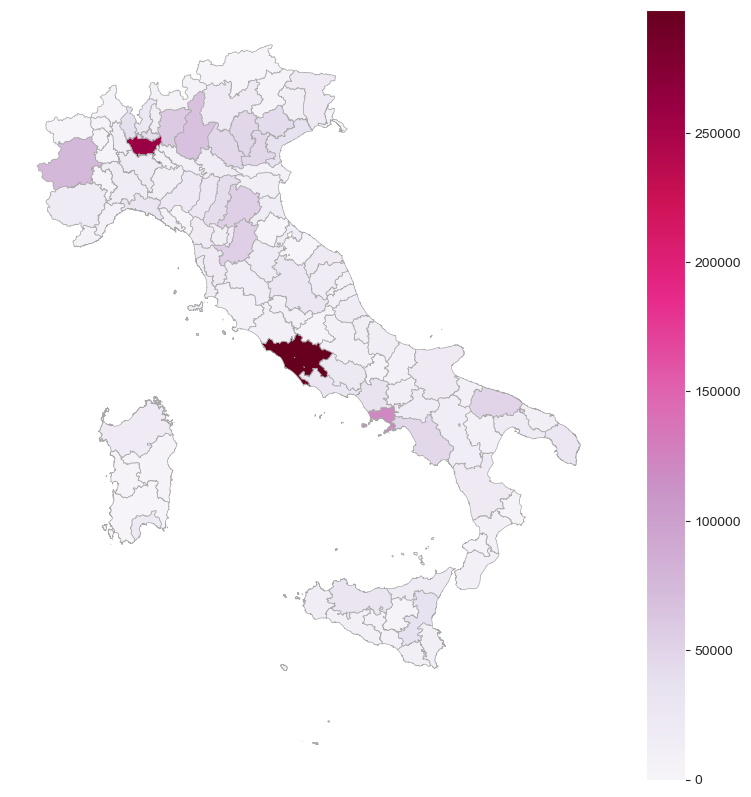

In [155]:
ax = ripartizioni_geografiche_prov.plot(column='Count',
                              cmap="PuRd",
                              legend=True,
                              edgecolor = "darkgrey",
                              linewidth = 0.5,
                              figsize=(10,10))
ax.set_axis_off()

Leggo con geopandas il file dei confini dell’Italia (Regioni)

In [156]:
ripartizioni_geografiche_reg = gpd.read_file(PATH_REGION_SHP)

In [157]:
ripartizioni_geografiche_reg = ripartizioni_geografiche_reg.dissolve("DEN_REG")
ripartizioni_geografiche_reg = ripartizioni_geografiche_reg.reset_index()

In [158]:
ripartizioni_geografiche_reg = pd.merge(left=ripartizioni_geografiche_reg, right=region_counts, how='left', left_on='DEN_REG', right_on='Regione')
ripartizioni_geografiche_reg = ripartizioni_geografiche_reg.fillna(0)

In [159]:
ripartizioni_geografiche_reg

,DEN_REG,geometry,COD_RIP,COD_REG,SHAPE_LENG,SHAPE_AREA,SHAPE_LEN,Regione,Count
0,Abruzzo,"MULTIPOLYGON (((930273.549 4714785.367, 930271...",4,13,6.645380e+05,1.083150e+10,6.645380e+05,Abruzzo,55440
1,Basilicata,"MULTIPOLYGON (((1073860.435 4445827.603, 10738...",4,17,6.757507e+05,1.007311e+10,6.757507e+05,Basilicata,19902
2,Calabria,"MULTIPOLYGON (((1146793.099 4470207.210, 11468...",4,18,9.346575e+05,1.522161e+10,9.346575e+05,Calabria,51759
3,Campania,"MULTIPOLYGON (((944981.754 4501025.678, 944990...",4,15,1.090753e+06,1.367060e+10,1.090753e+06,Campania,229903
4,Emilia-Romagna,"MULTIPOLYGON (((618312.929 4893985.660, 618304...",2,8,1.260949e+06,2.245221e+10,1.260949e+06,Emilia-Romagna,219207
5,Friuli Venezia Giulia,"MULTIPOLYGON (((869445.481 5062450.259, 869274...",2,6,7.672972e+05,7.924217e+09,7.672972e+05,Friuli Venezia Giulia,45956
6,Lazio,"MULTIPOLYGON (((824309.327 4537124.990, 824312...",3,12,1.201765e+06,1.723172e+10,1.201765e+06,Lazio,363992
7,Liguria,"MULTIPOLYGON (((438249.458 4874982.072, 438231...",1,7,1.080307e+06,5.416134e+09,1.080307e+06,Liguria,53147
8,Lombardia,"MULTIPOLYGON (((476802.180 4984445.982, 476759...",1,3,1.511132e+06,2.386310e+10,1.511132e+06,Lombardia,565964
9,Marche,"POLYGON ((801317.492 4875251.454, 801336.492 4...",3,11,7.110915e+05,9.401183e+09,7.110915e+05,Marche,76052


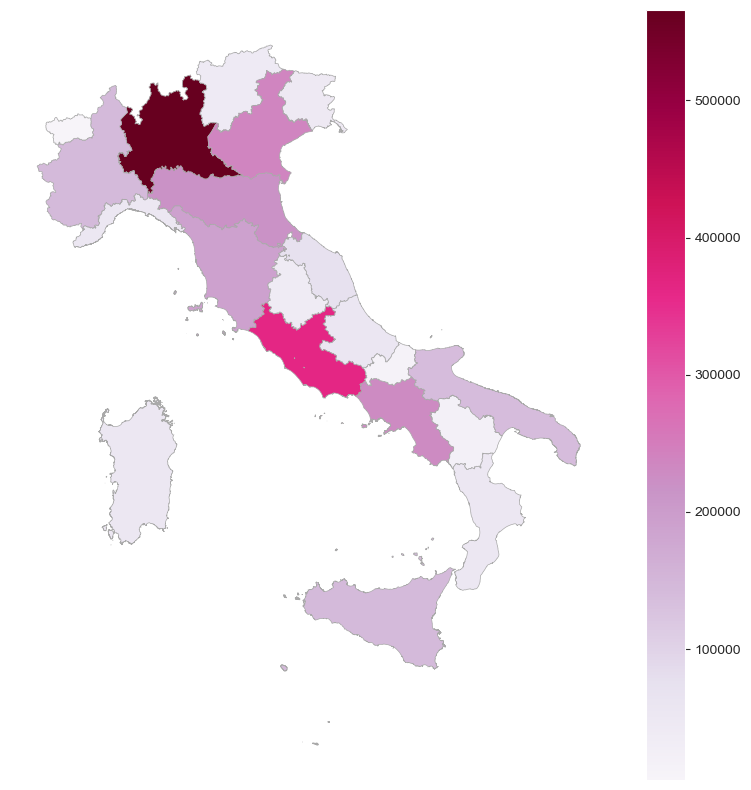

In [160]:
ax = ripartizioni_geografiche_reg.plot(column='Count',
                                        cmap="PuRd",
                                        legend=True,
                                        edgecolor = "darkgrey",
                                        linewidth = 0.5,
                                        figsize=(10,10))
ax.set_axis_off()

Filtro i dati per l'analisi di dimensione

In [161]:
dimensioni_dataset = full_dataset[["Ragione sociale", "Legal Status", "Company Size"]].copy()
dimensioni_dataset["Company Size"] = dimensioni_dataset["Company Size"].replace({"Piccole": "Small"})
dimensioni_dataset["Company Size"] = dimensioni_dataset["Company Size"].replace({"Medie": "Medium"})
dimensioni_dataset["Company Size"] = dimensioni_dataset["Company Size"].replace({"Grandi": "Big"})

In [162]:
dimensioni_counts = pd.DataFrame(dimensioni_dataset [["Company Size","Legal Status"]].value_counts()).reset_index()
dimensioni_counts = dimensioni_counts.rename(columns={0: "Number of records"})

In [163]:
dimensioni_counts

,Company Size,Legal Status,Number of records
0,Small,Active,2270525
1,Small,Bankruptcy,308472
2,Medium,Active,69364
3,Medium,Bankruptcy,20588
4,Big,Active,14320
5,Big,Bankruptcy,2968


<Axes: xlabel='Company Size', ylabel='Number of records'>

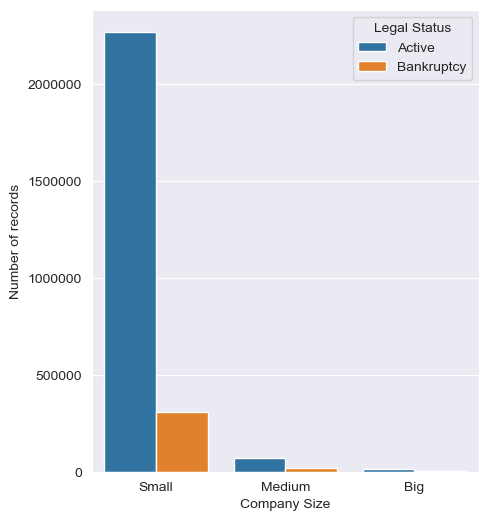

In [164]:
f, ax = plt.subplots(figsize=(5,6))
ax.ticklabel_format(style='plain', axis='both')
sns.barplot(data=dimensioni_counts, x="Company Size", y="Number of records", hue="Legal Status", ax=ax)